# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [7]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
data = pd.read_csv("Boston.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 506 rows and 13 columns.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**
* There are 506 non-null values in each column. This states that there are no missing values in the data.
* All columns in the data set are numeric data type.

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
* Several variables have high variability and wide ranges, indicating diverse characteristics across towns.
* Some variables show less variability and more uniformity. The dataset represents a diverse set of towns with varying socioeconomic and environmental factors.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

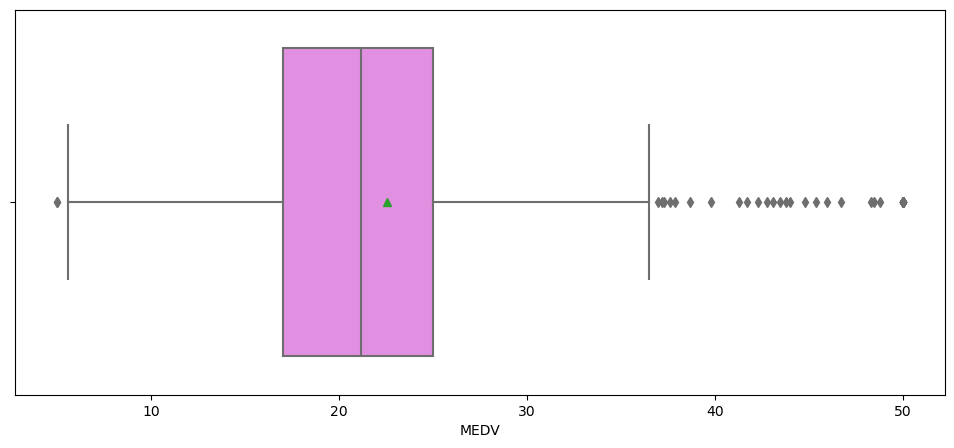

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(
        data = data, x = "MEDV", showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
plt.show()

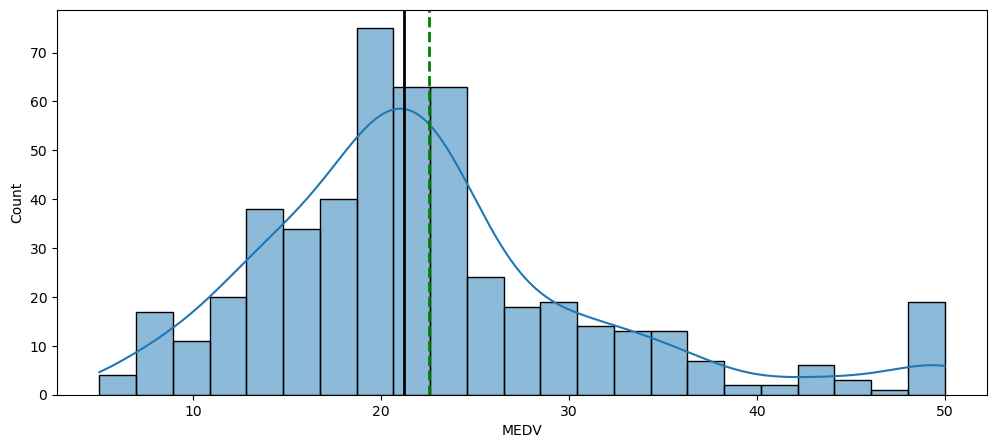

In [6]:
median_value = data['MEDV'].median()
mean_value = data['MEDV'].mean()

plt.figure(figsize=(12,5))
sns.histplot(
        data = data, x = "MEDV", kde = True, palette = "winter"
    )
# Adding a solid black line for the median
plt.axvline(median_value, color='black', linestyle='-', linewidth=2, label='Median')

# Adding a broken green line for the mean
plt.axvline(mean_value, color='green', linestyle='--', linewidth=2, label='Mean')

plt.show()

**Observations:**
* MEDV is skewed so we need to perform log transformation on it and check the distribution on the transformed column.

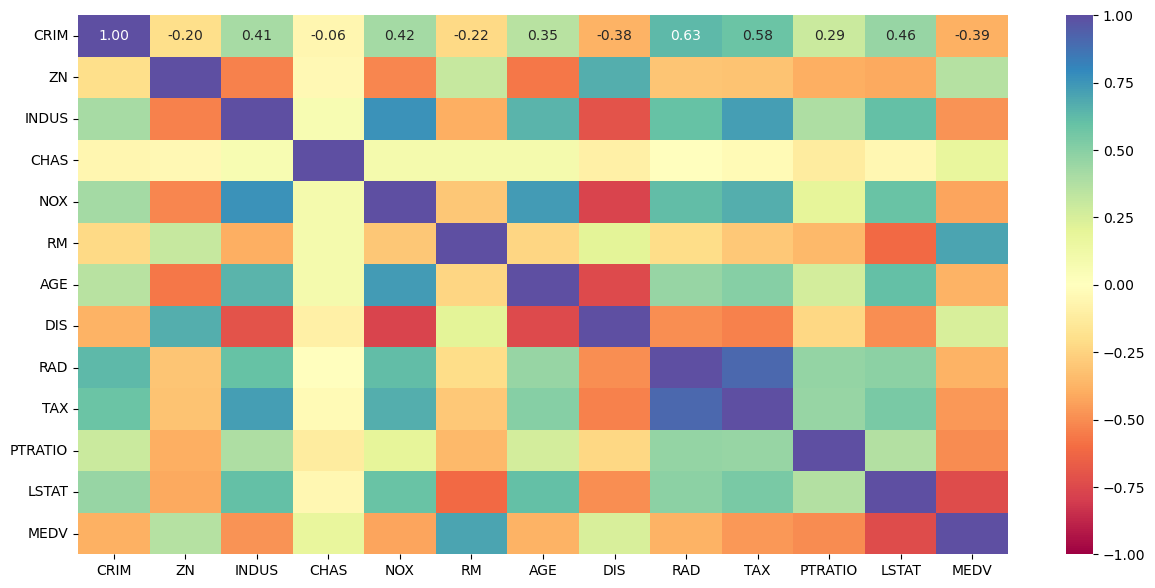

In [51]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()


plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations:**
* The heatmap above shows the relationships of all columns to each other. There are several columns which highly correlate to each other and several do not.

In [21]:
def histogram_boxplot(data, feature, kde = False):
    plt.figure(figsize=(12,10))
    sns.boxplot(
            data = data, x = feature, showmeans = True, color = "violet"
        )  # Boxplot will be created and a star will indicate the mean value of the column
    
    plt.figure(figsize=(12,10))
    sns.histplot(
            data = data, x = feature, kde = True, palette = "winter"
        )
    # Adding a solid black line for the median
    plt.axvline(data[feature].median(), color='black', linestyle='-', linewidth=2, label='Median')
    
    # Adding a broken green line for the mean
    plt.axvline(data[feature].mean(), color='green', linestyle='--', linewidth=2, label='Mean')
    plt.show()

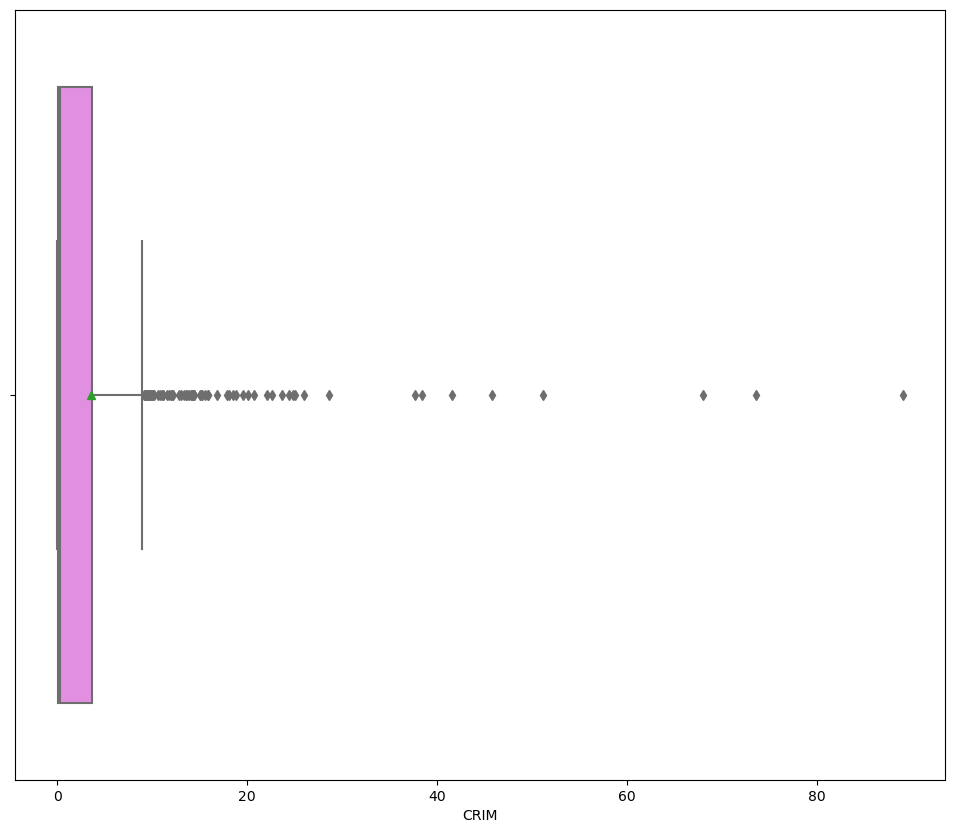

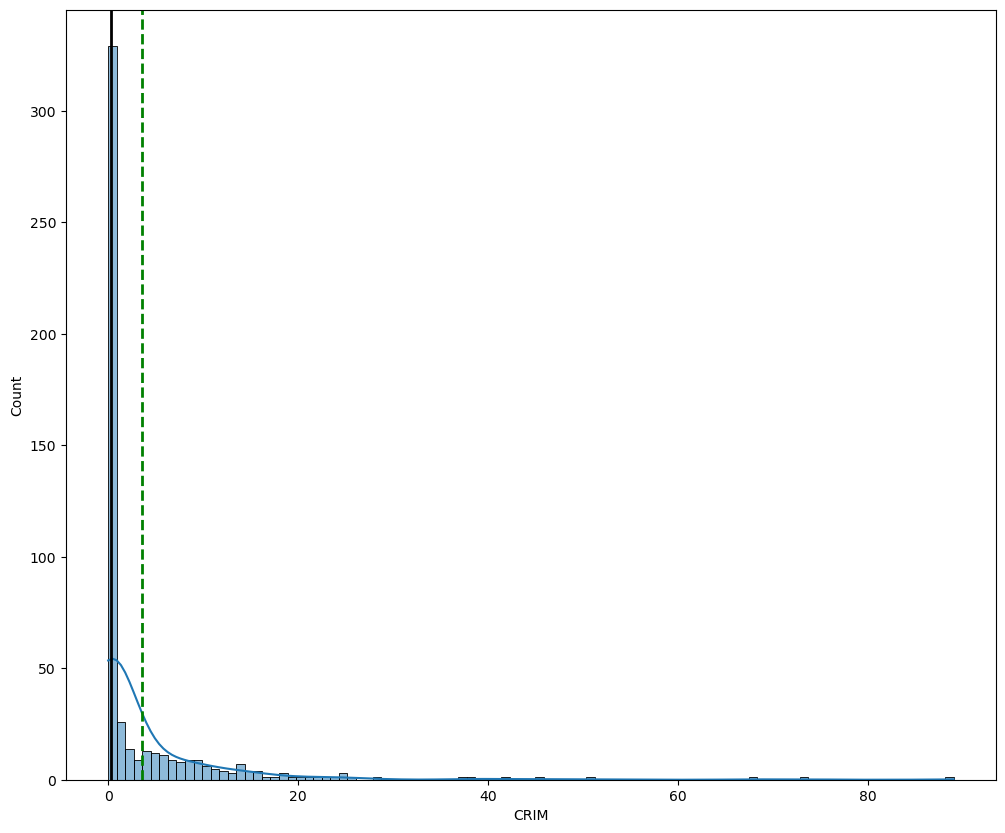

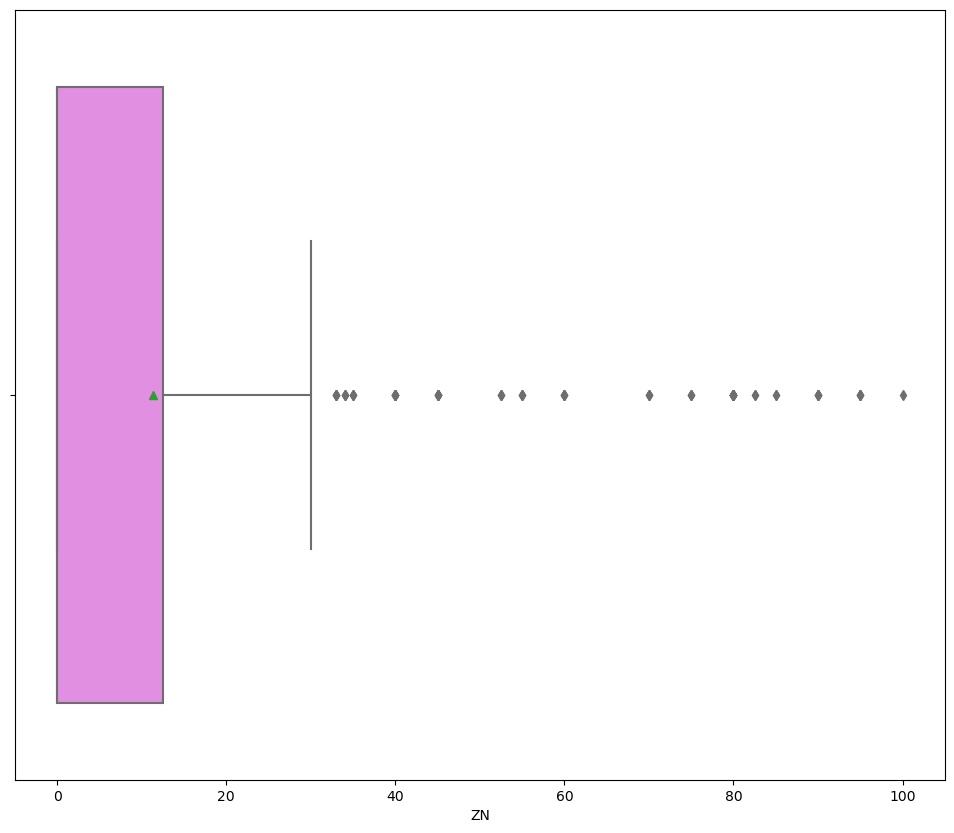

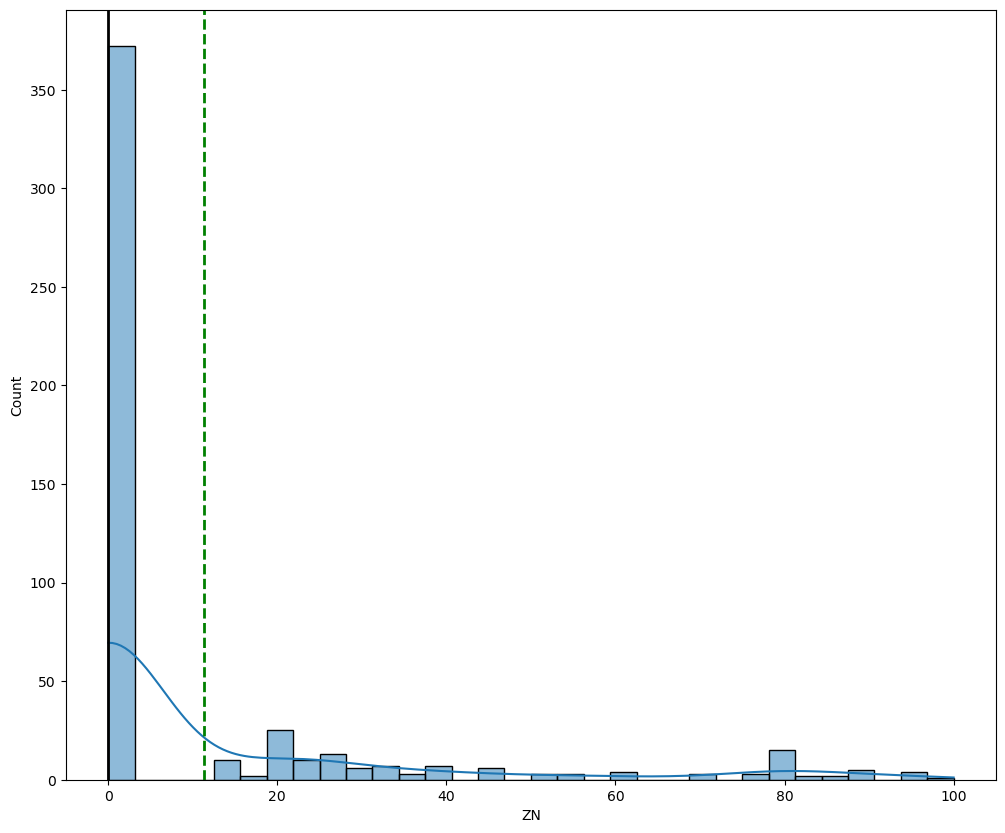

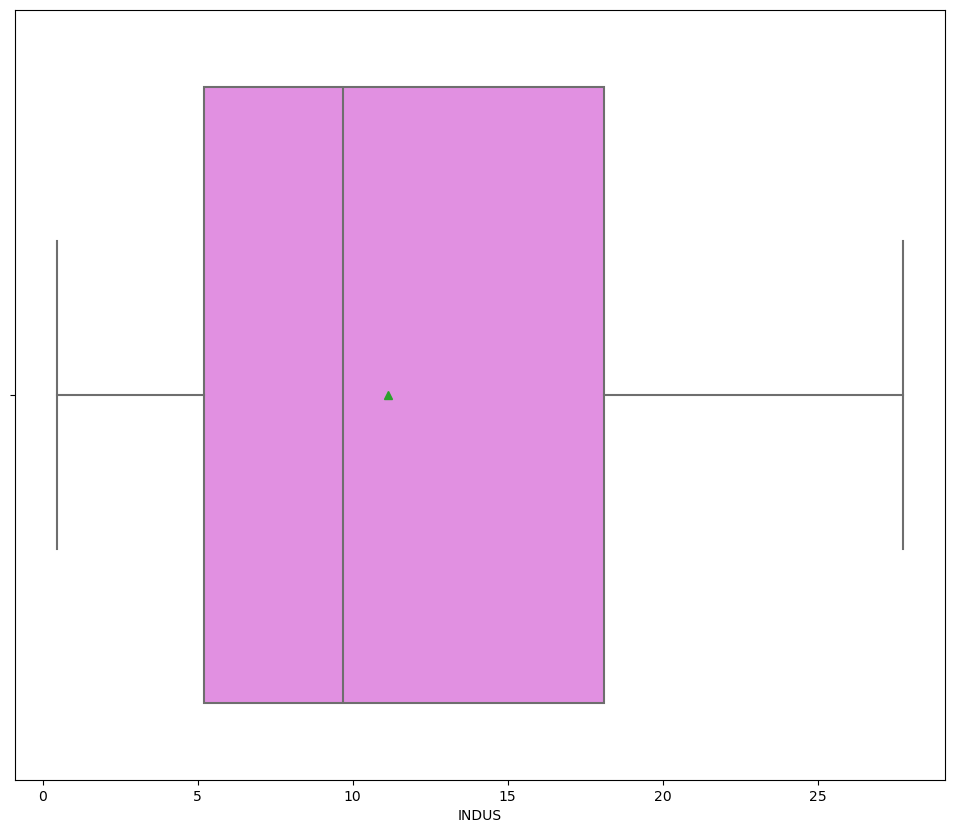

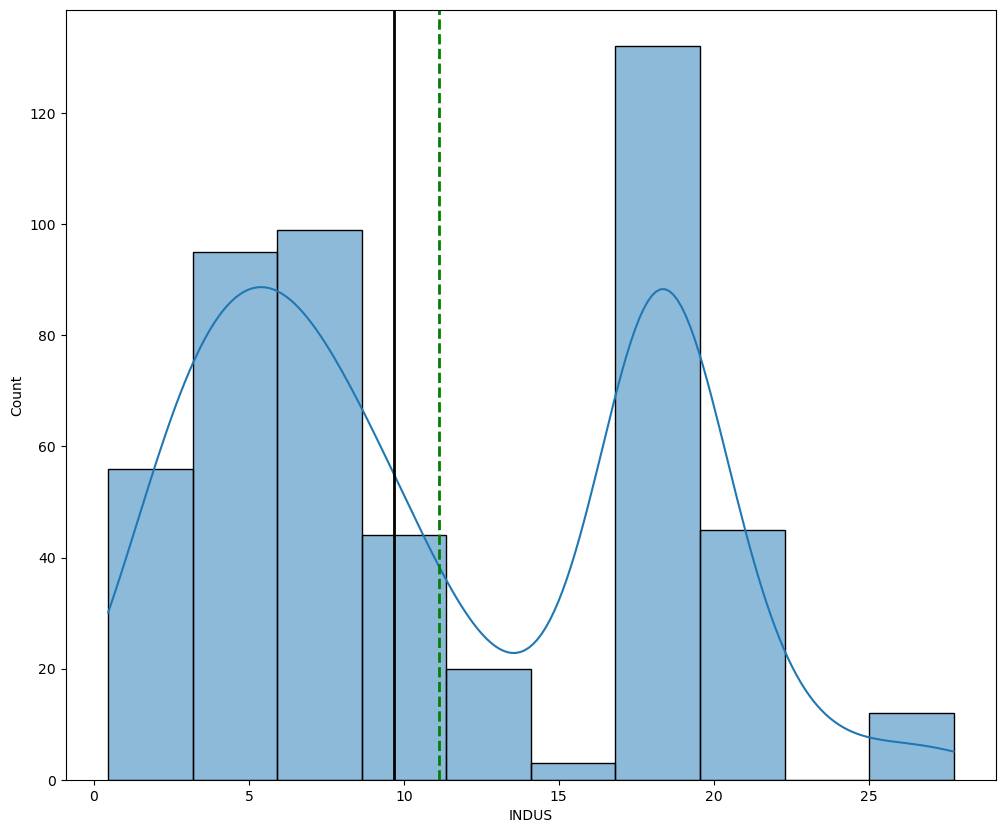

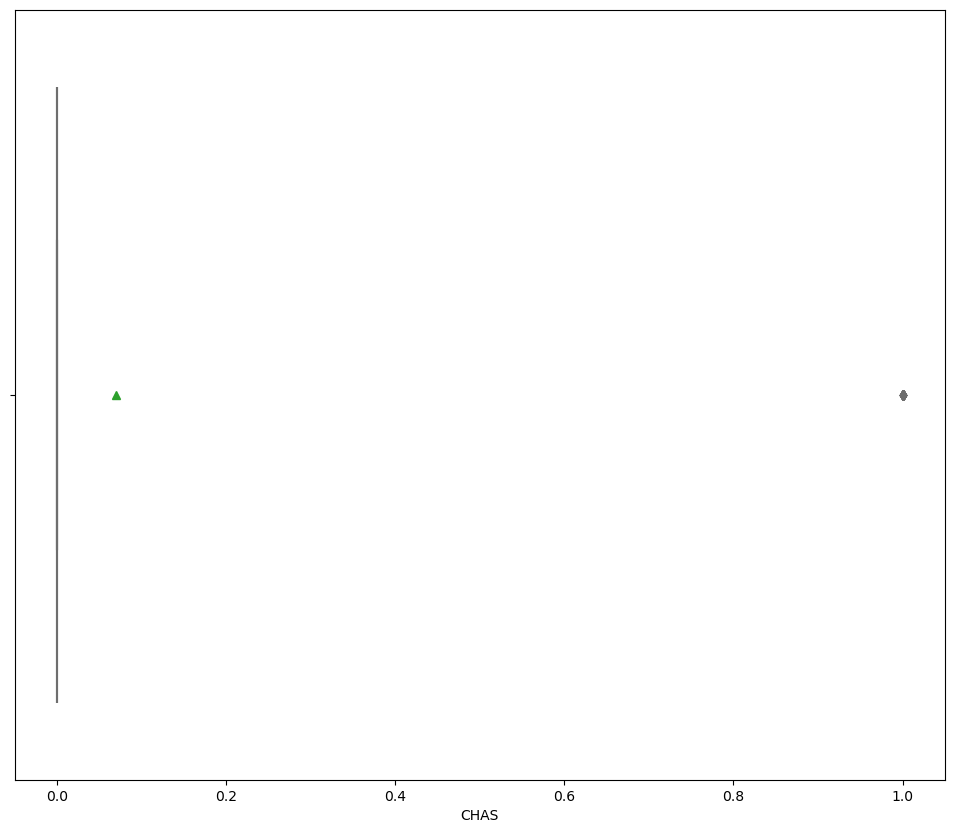

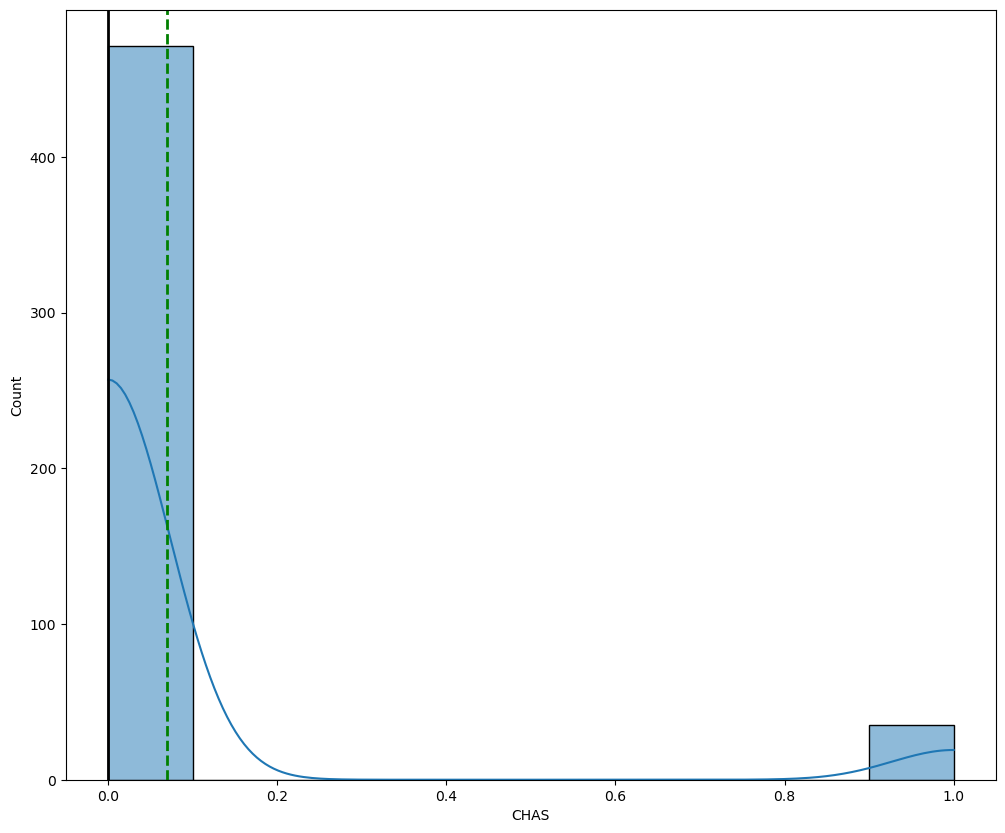

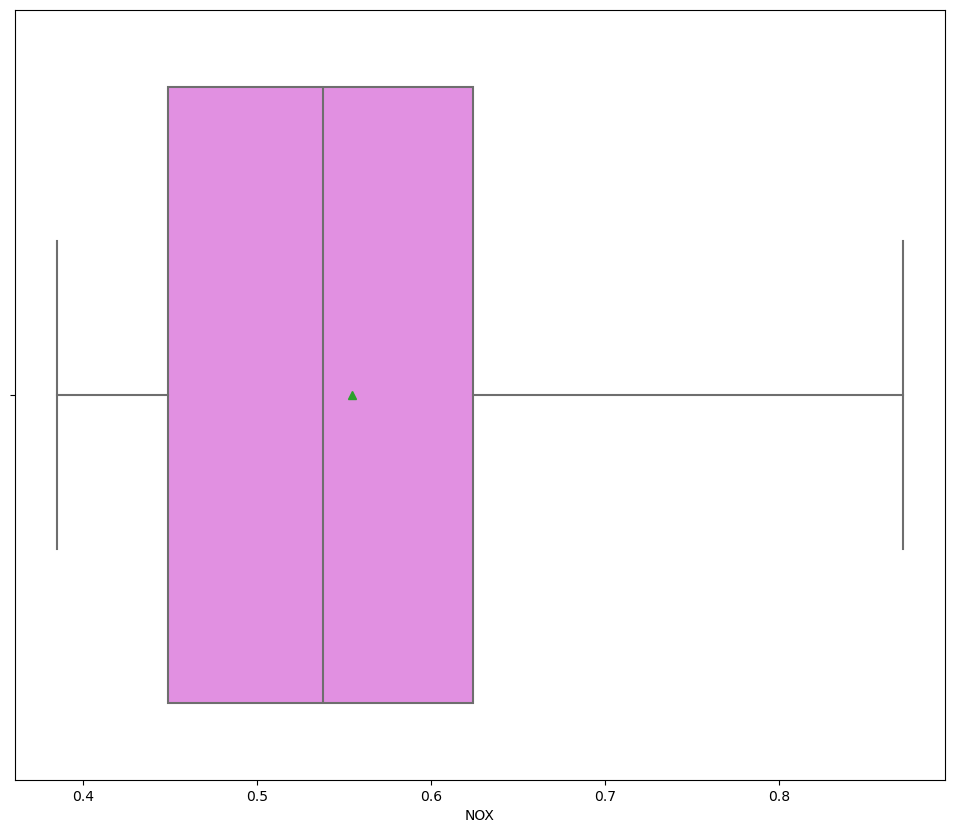

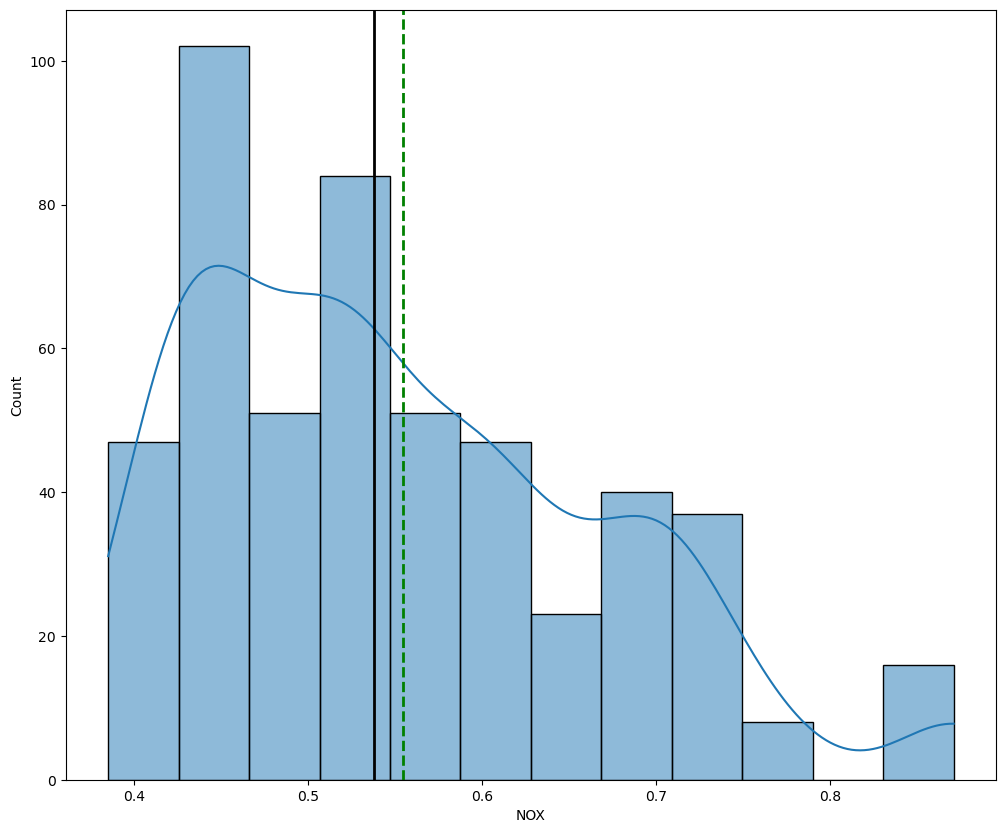

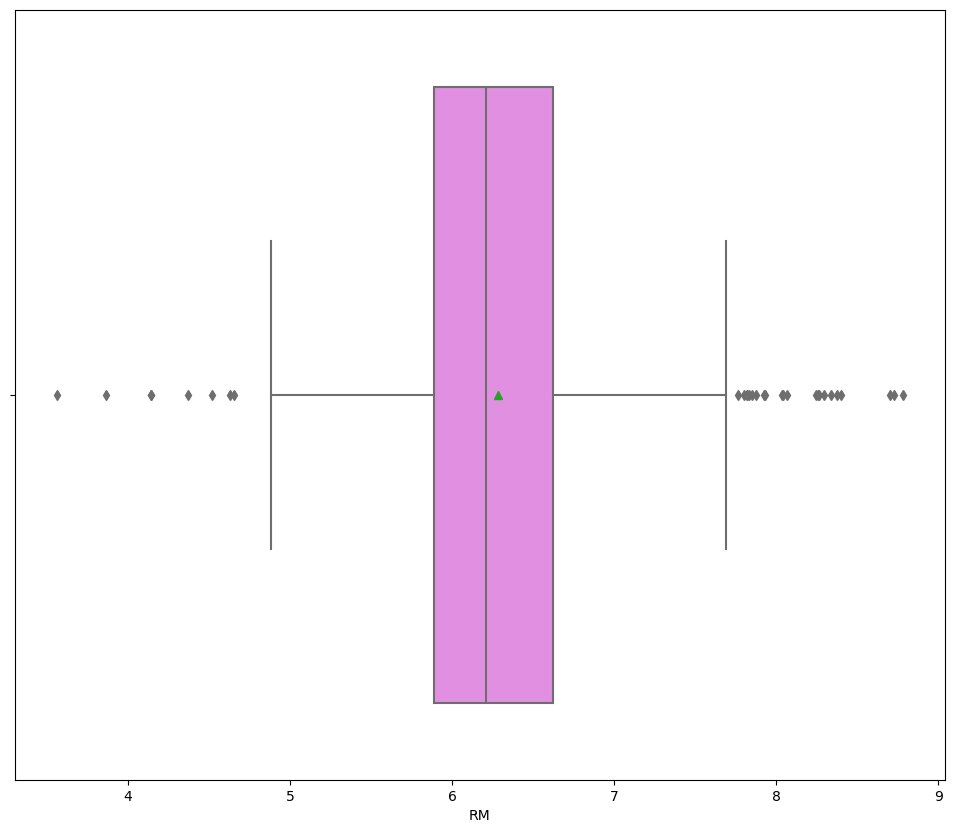

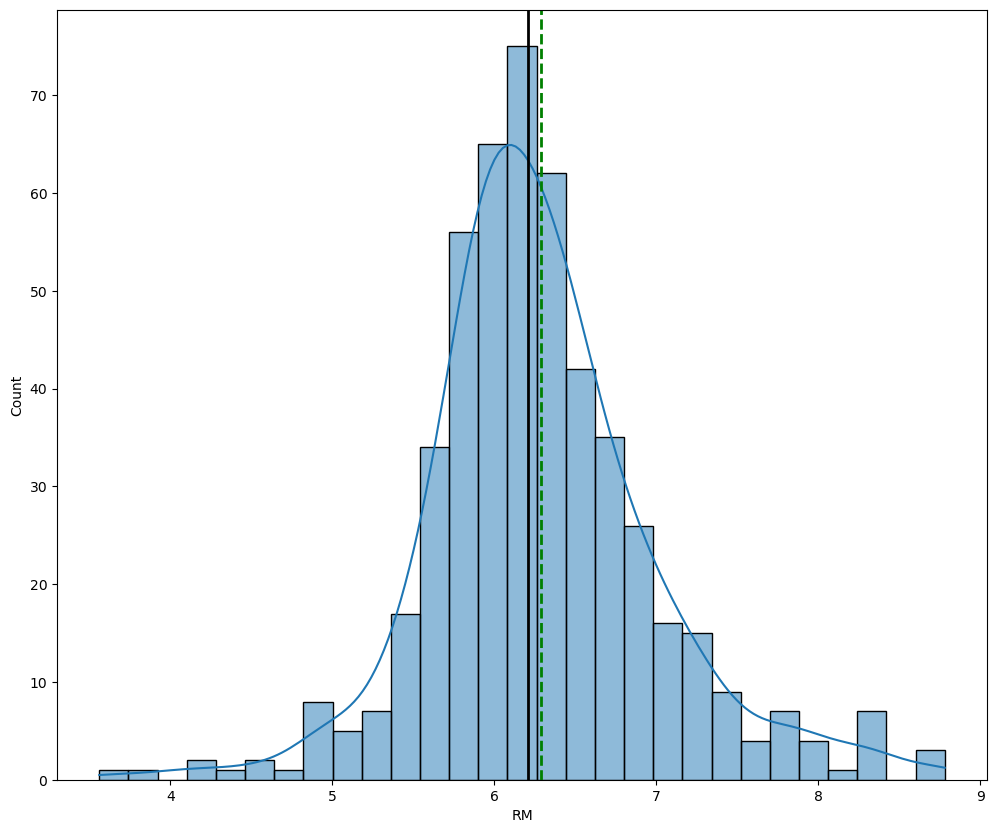

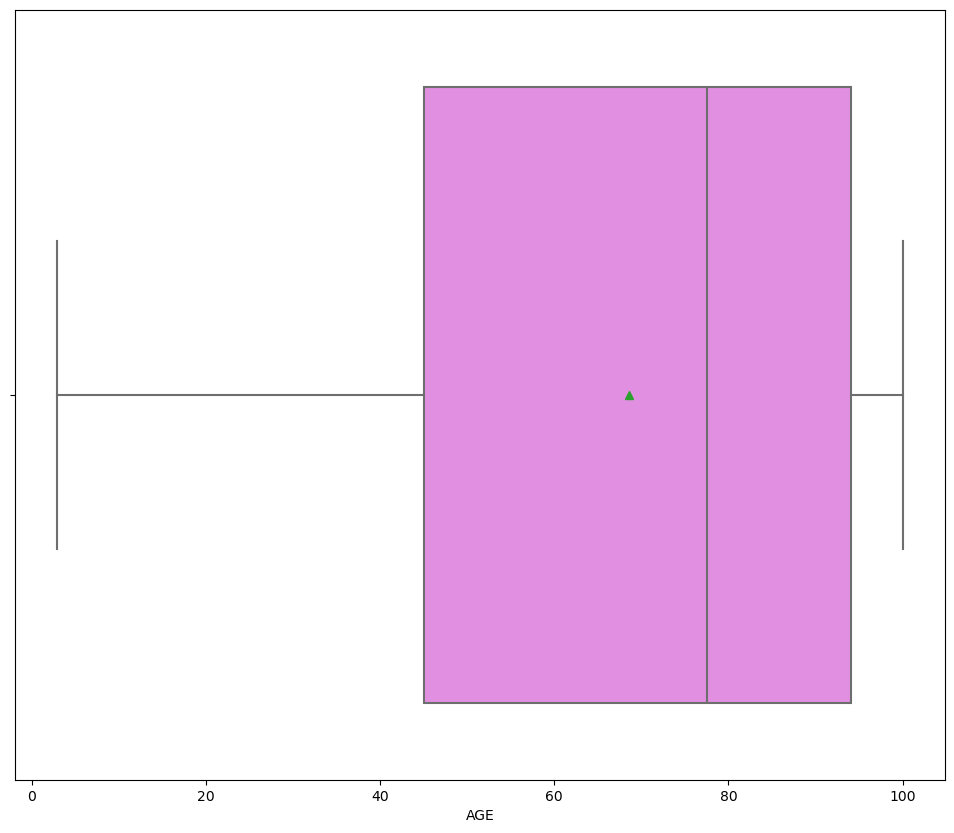

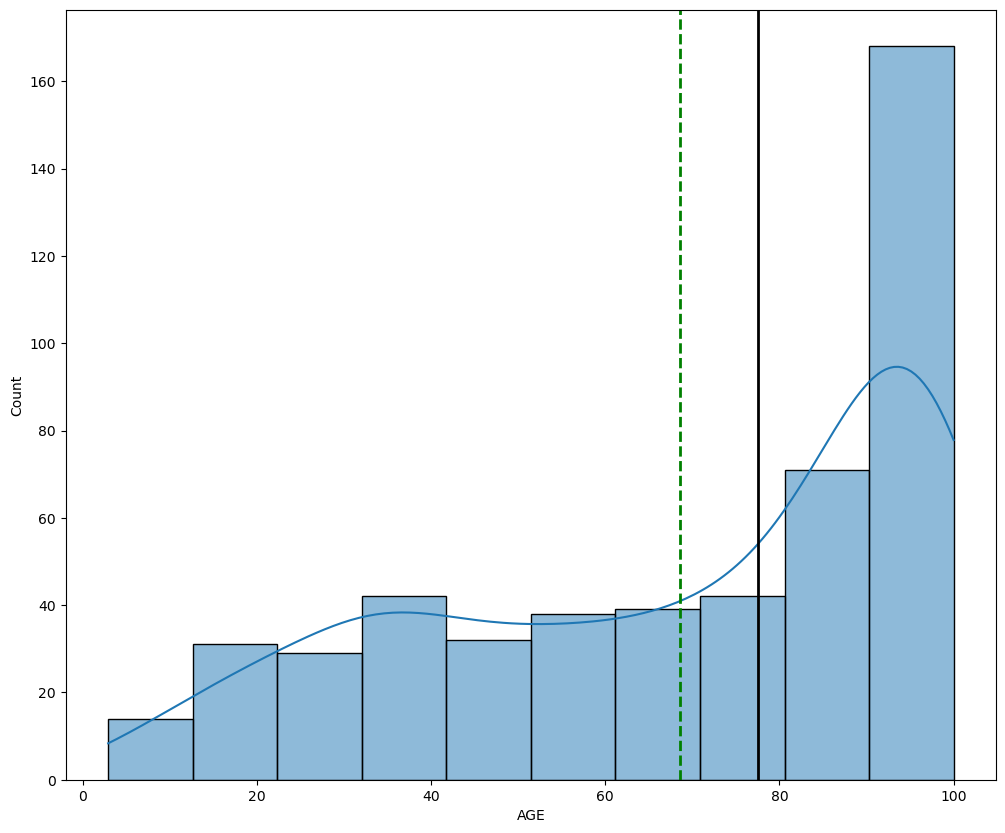

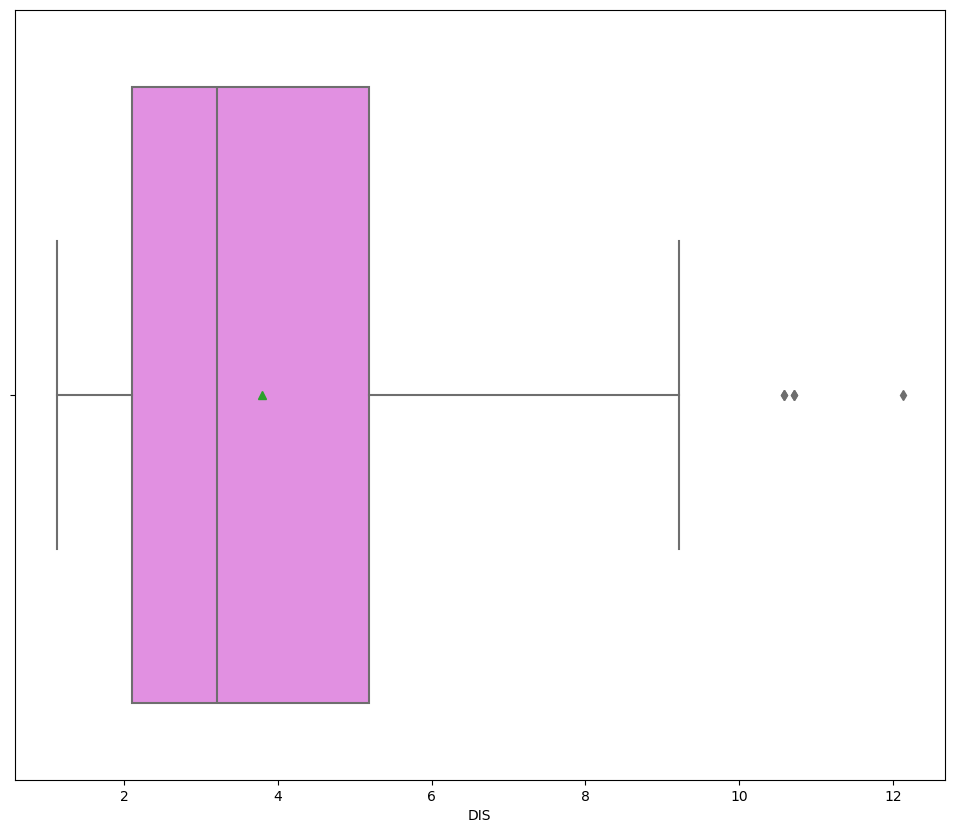

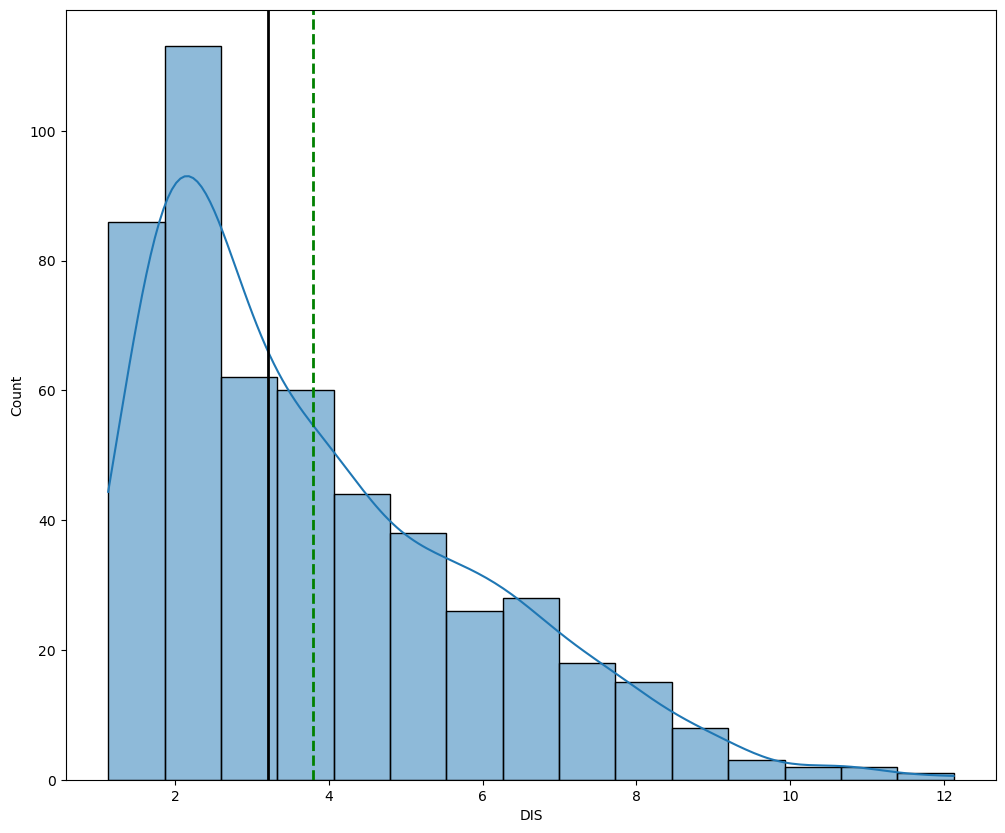

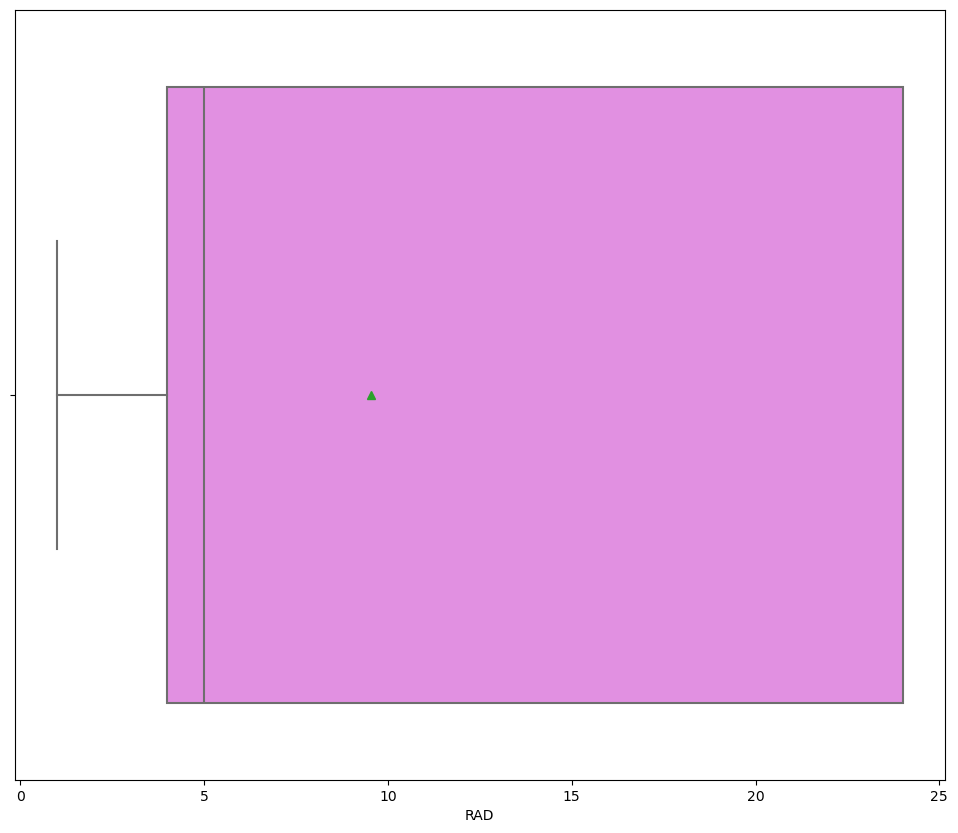

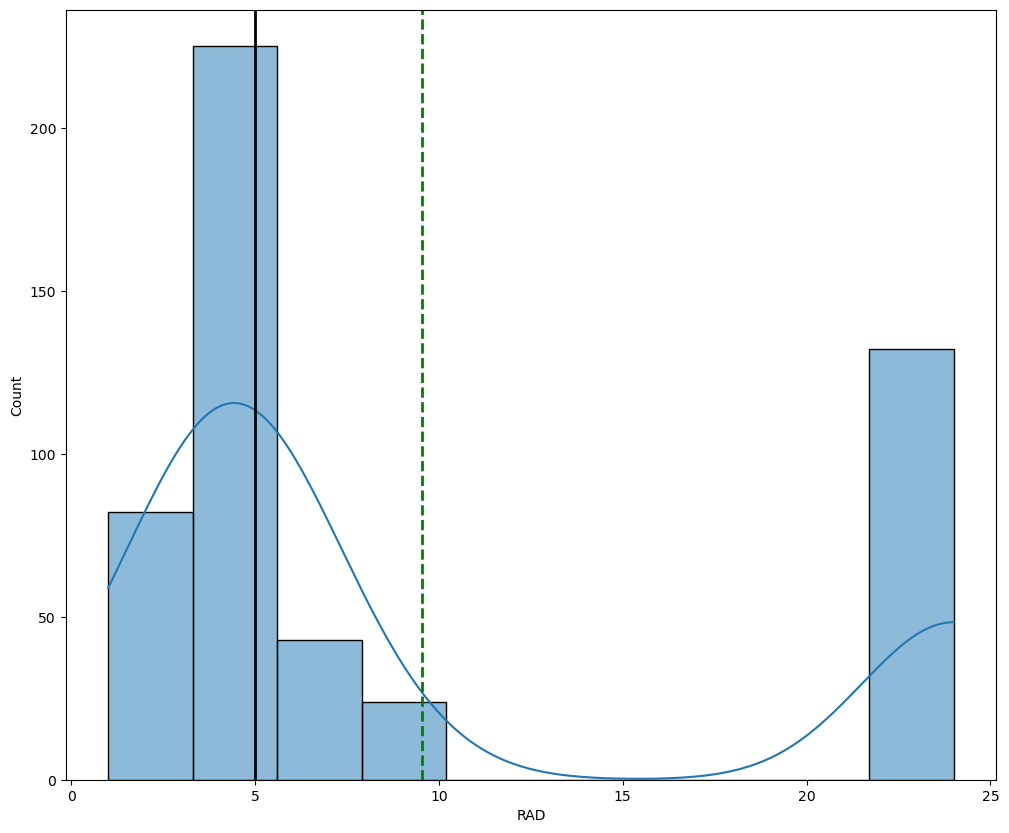

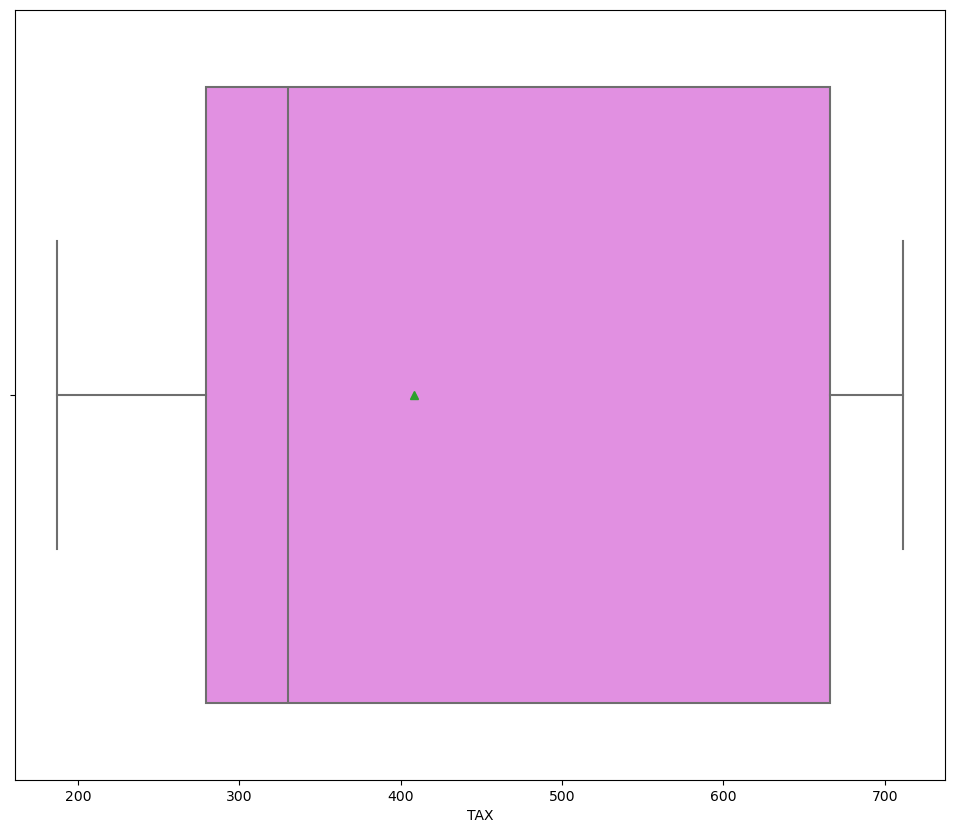

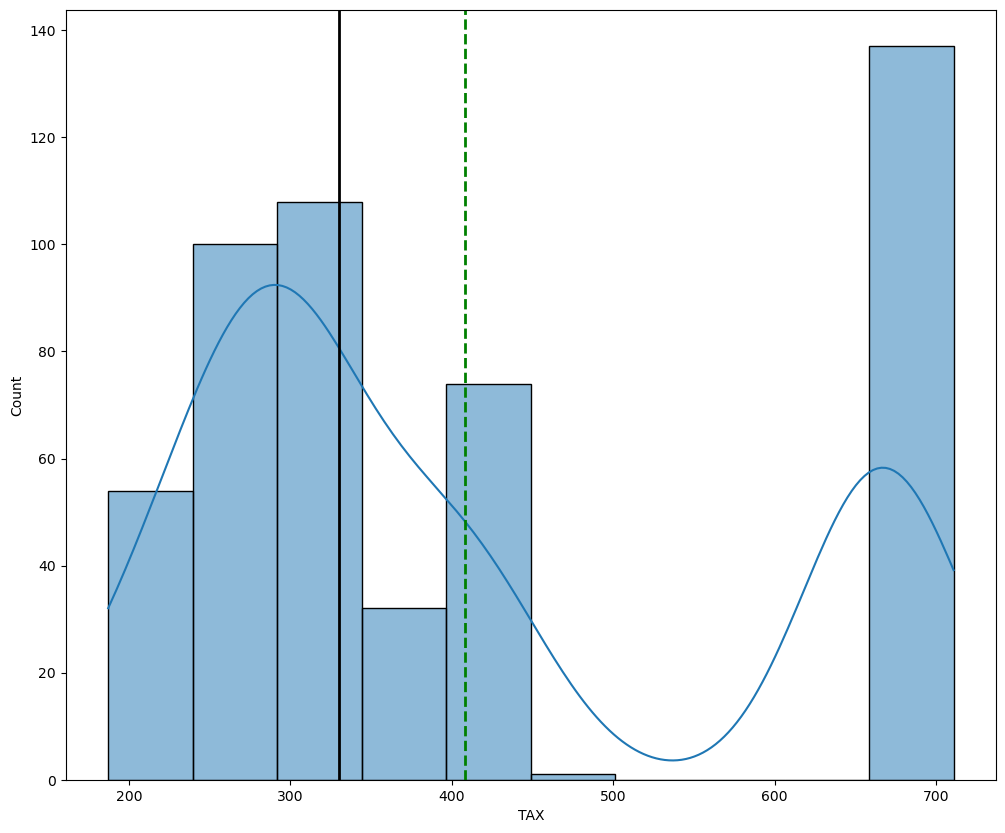

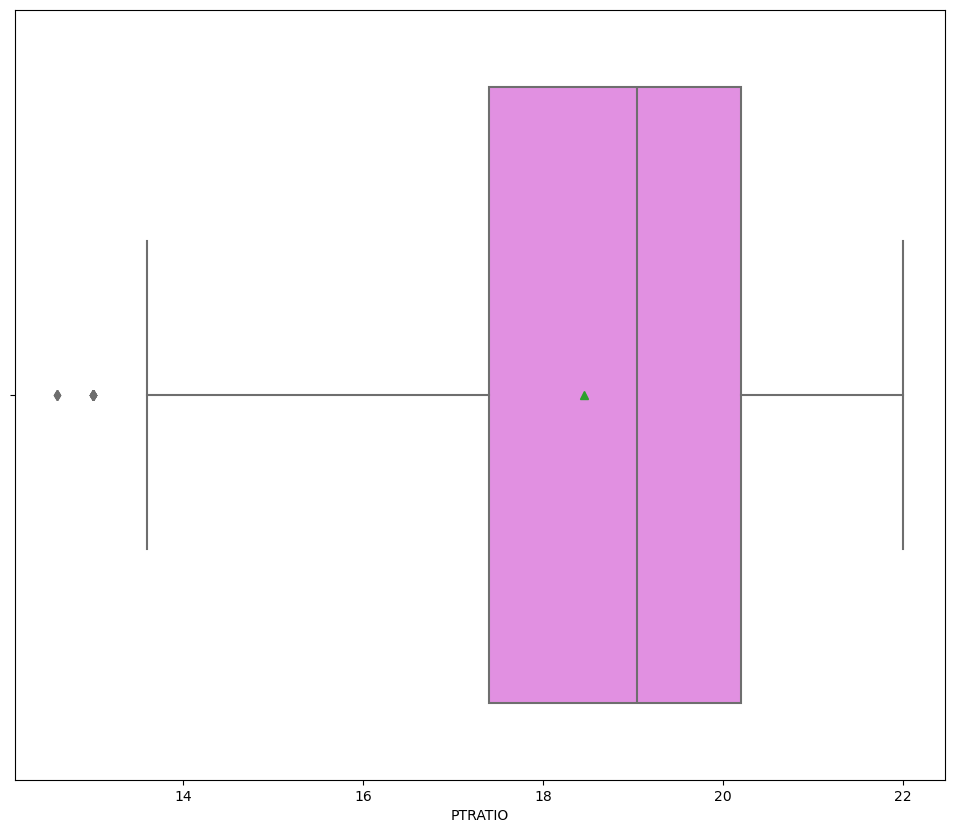

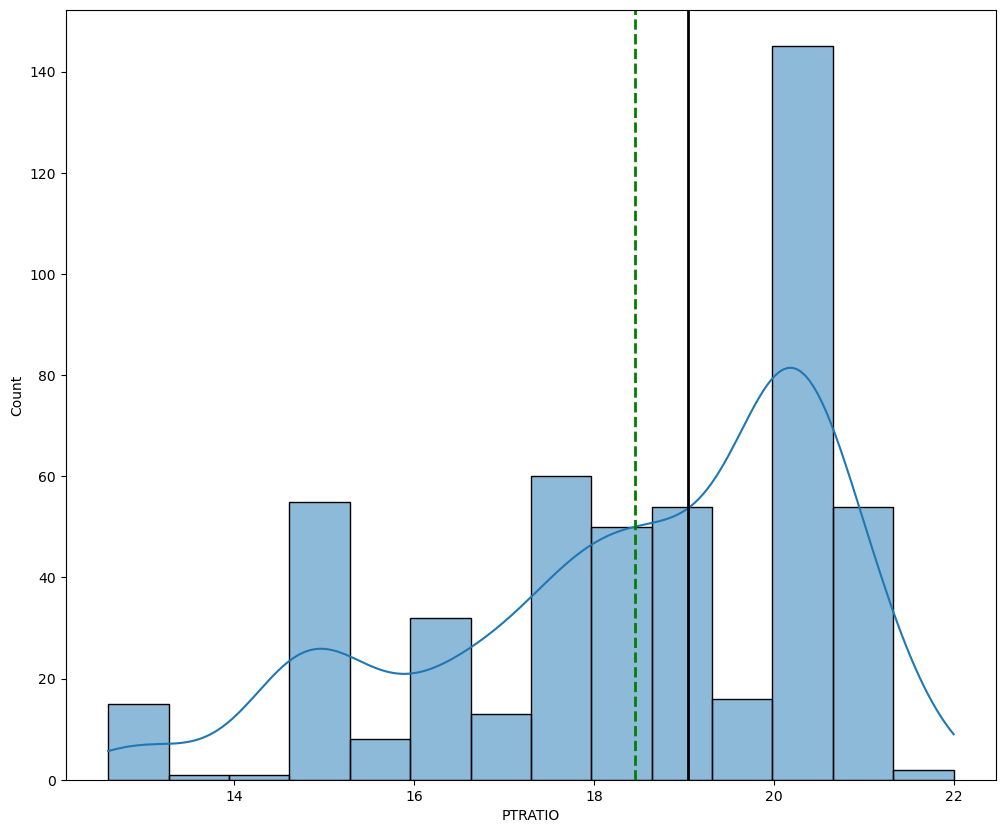

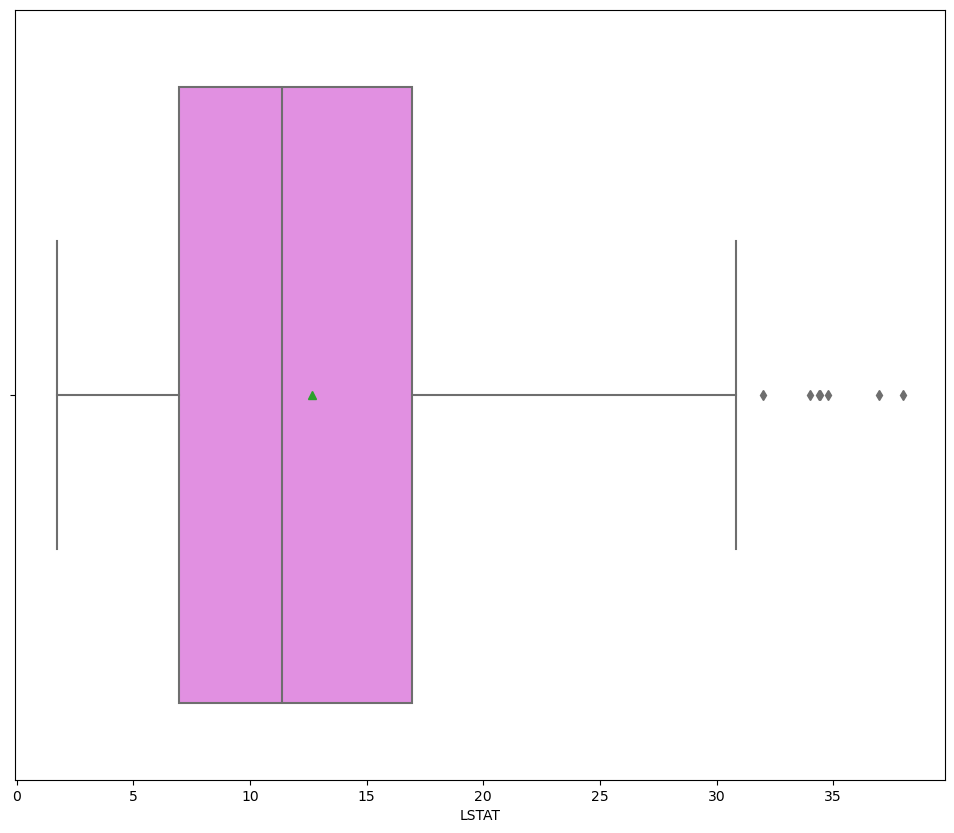

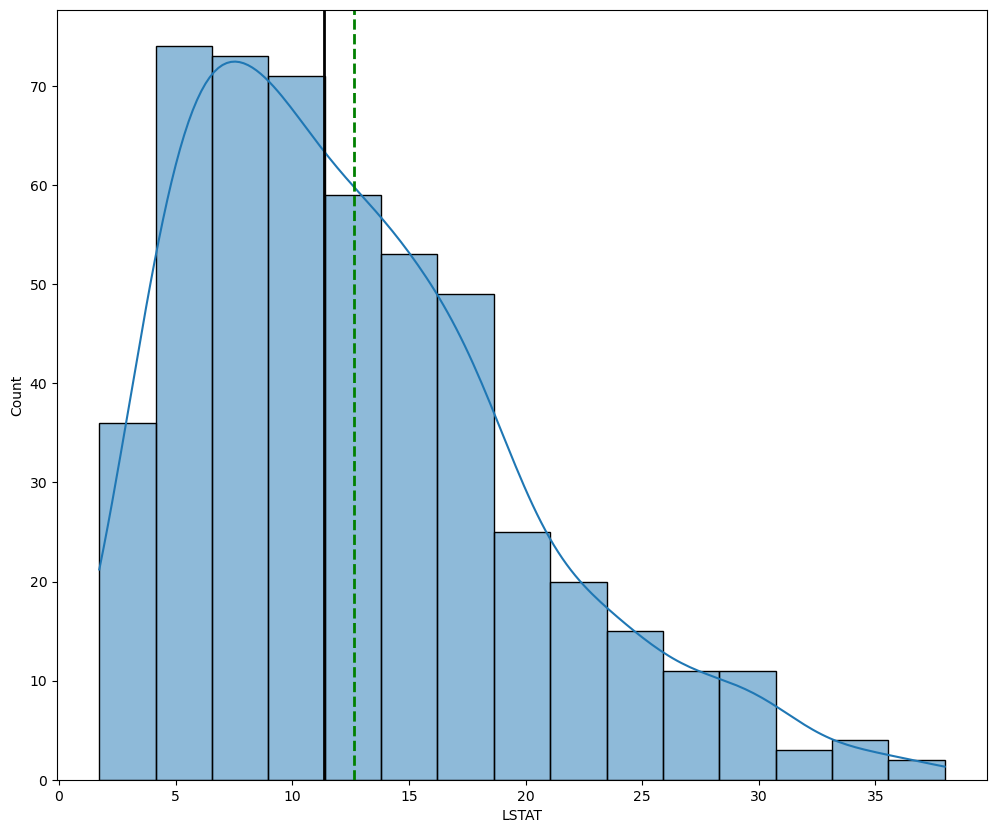

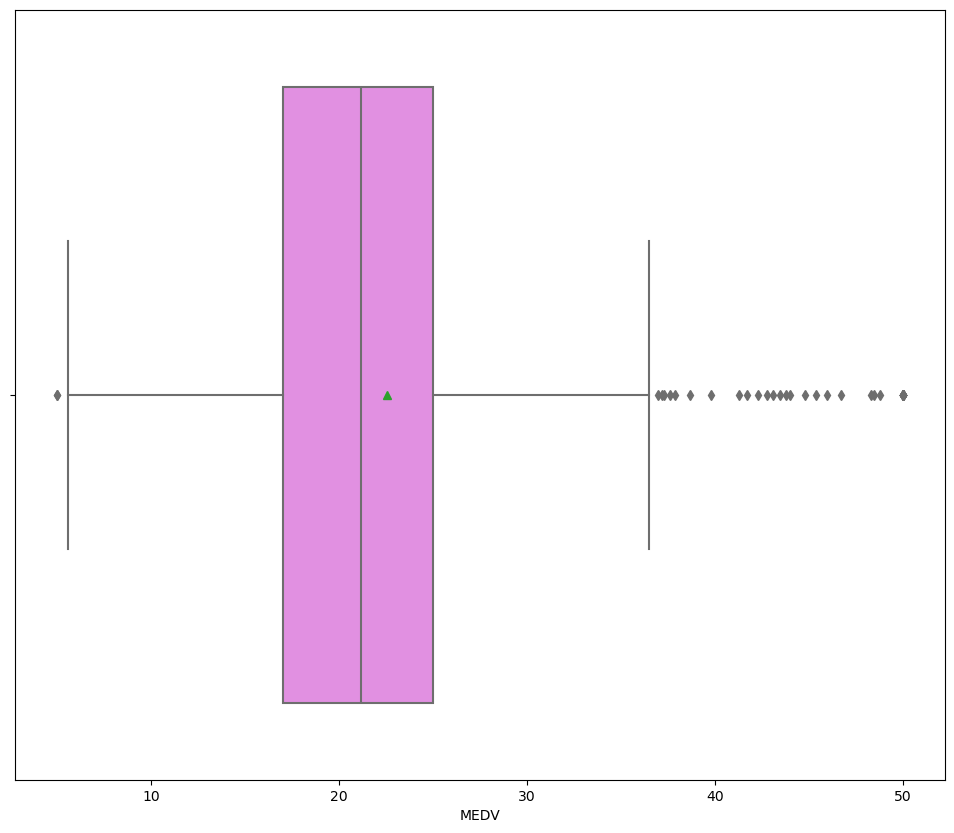

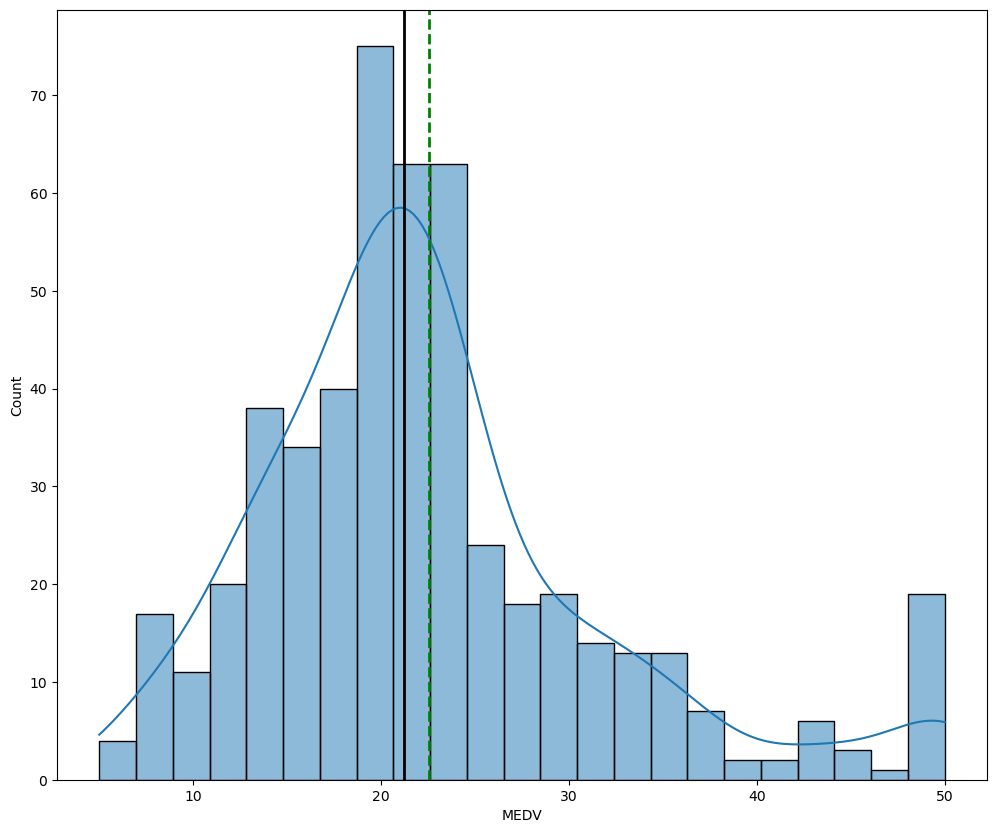

In [22]:
for column in data.columns:
    histogram_boxplot(data, column)

**Observations:**
* CRIM is right skewed.
* ZN is right skewed.
* INDUS is slightly skewed towards right.
* CHAS is right skewed.
* NOX is right skewed.
* RM is uniformly distributed.
* AGE is left skewed.
* DIS is right skewed.
* RAD is right skewed.
* TAX is right skewed.
* PTRATIO is left skewed.
* LSTAT is right skewed.
* MEDV is right skewed.

The correlation between INDUS and NOX is: 0.7636514469209147


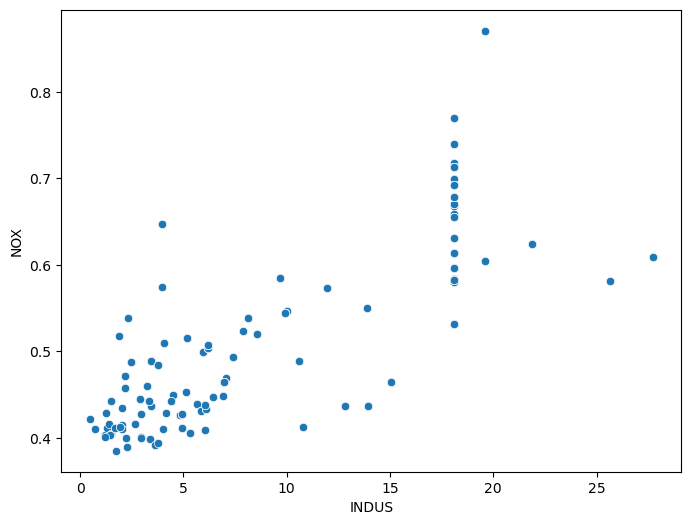

The correlation between INDUS and DIS is: -0.7080269887427683


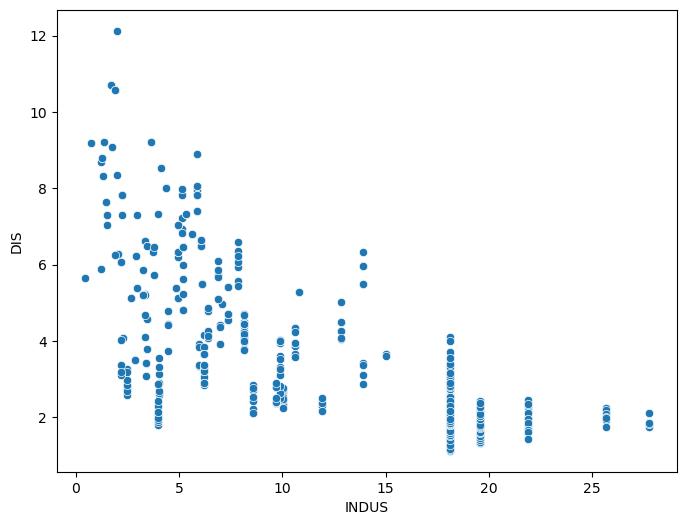

The correlation between INDUS and TAX is: 0.720760179951542


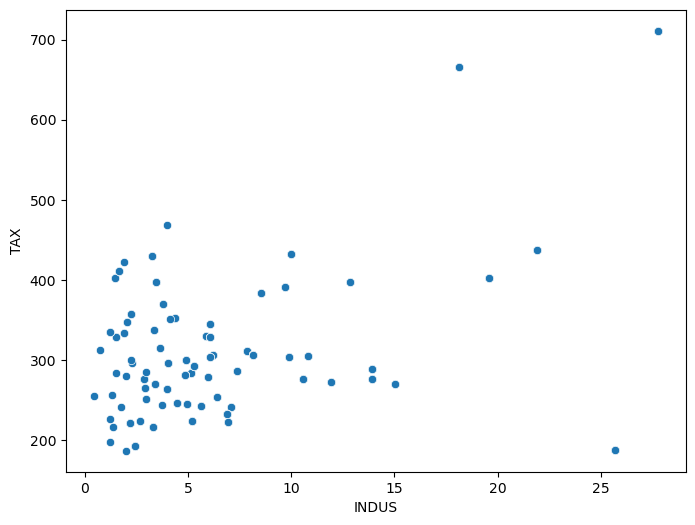

The correlation between NOX and AGE is: 0.7314701037859582


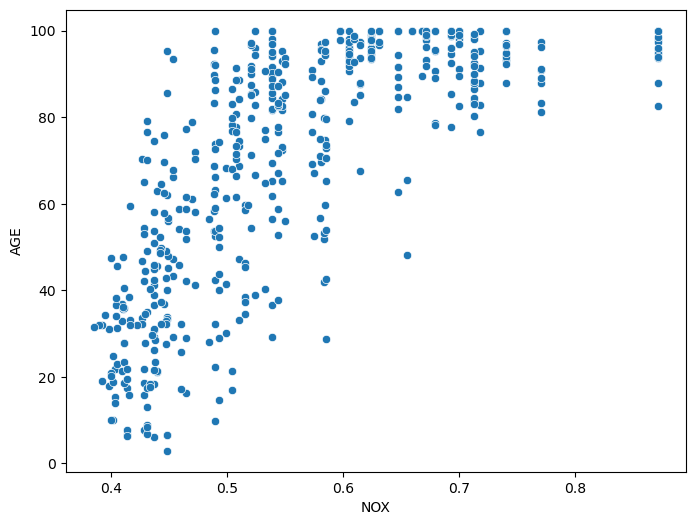

The correlation between NOX and DIS is: -0.7692301132258278


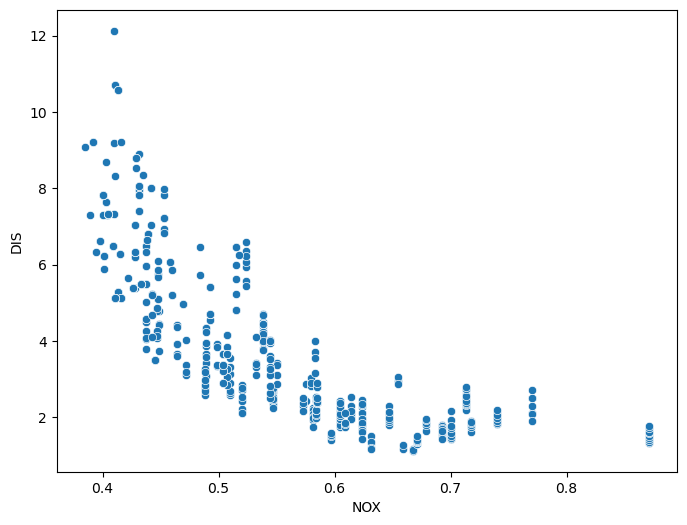

The correlation between AGE and DIS is: -0.7478805408686319


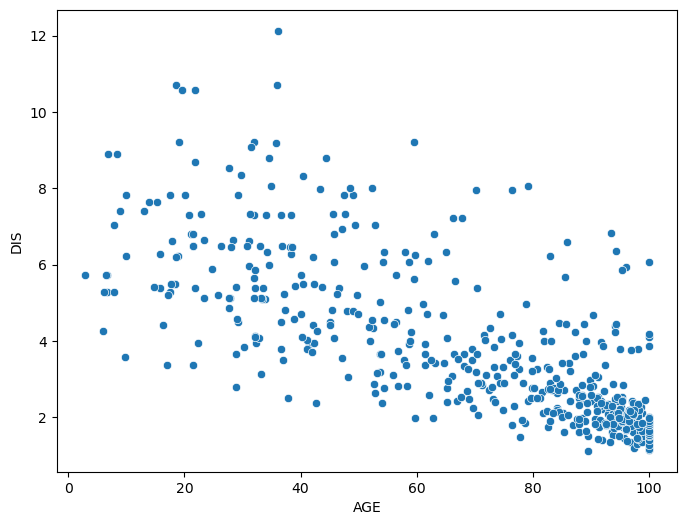

The correlation between RAD and TAX is: 0.9102281885331845


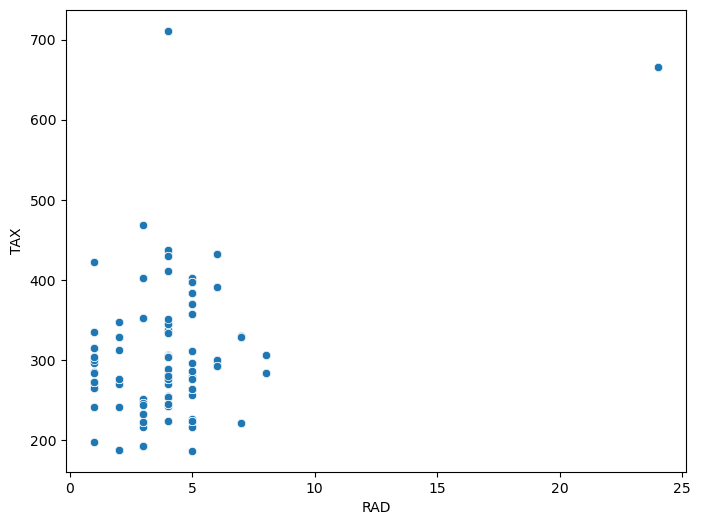

The correlation between LSTAT and MEDV is: -0.7376627261740148


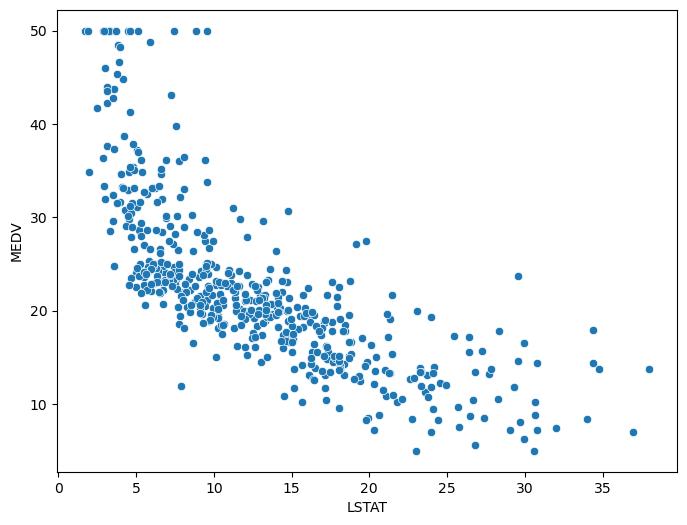

In [23]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()
for i in range(len(cols_list)):
    for j in range(i+1, len(cols_list)):
        correlation_value = data[cols_list[i]].corr(data[cols_list[j]])
        if (correlation_value >= 0.7 or correlation_value <= -0.7):
            print(f'The correlation between {cols_list[i]} and {cols_list[j]} is: {correlation_value}')
            plt.figure(figsize = [8, 6])
            sns.scatterplot(x = data[cols_list[i]], y = data[cols_list[j]])
            plt.show()

**Observations:**
* INDUS and NOX are prositively correlated, indicating that higher industrial activity is associated with increased air pollution.
* INDUS and DIS are negatively correlated, indicating that higher industrial activities are closer in distance.
* INDUS and TAX are positively correlated, indicating that less industrial activites are taxed less and higher industrial activities are taxed higher.
* NOX and AGE are negatively correlated, indicating that older buildings have higher Nitric Oxide concentration.
* NOX and DIS are negatively correlated, indicating that Nitric Oxide concentration is higher at longer distances and lower at closer distances.
* AGE and DIS are negatively correlated, indicating that as AGE increases DIS decreases.
* RAD and TAX are positively correlated, indicating that tax are lower for lower accessibilty to radial highways and increases for higher RAD.
* LSTAT and MEDV are negatively correlated, indicating that lower status of population have higher Median value of owner-occupied homes.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df = data.copy()

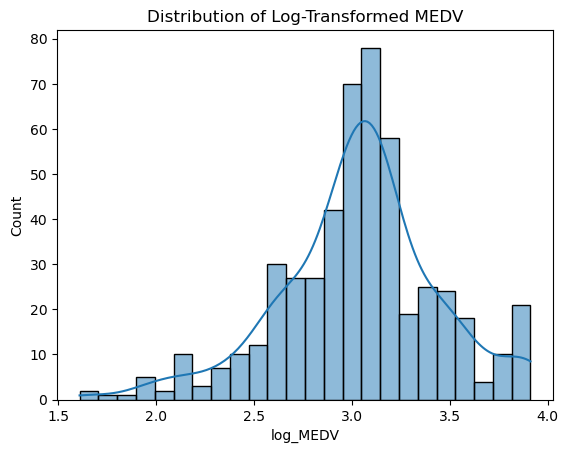

In [28]:
df['log_MEDV'] = np.log(df['MEDV'])
df = df.drop(columns=['MEDV'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_MEDV'], kde=True)
plt.title('Distribution of Log-Transformed MEDV')
plt.show()

**Observations:**
* The log transformed "log_MEDV" has normal distribution without shew.

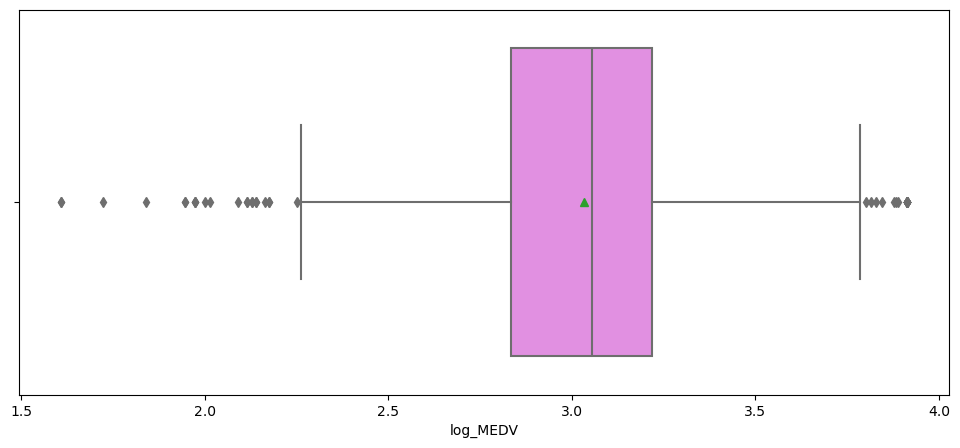

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(
        data = df, x = "log_MEDV", showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
plt.show()

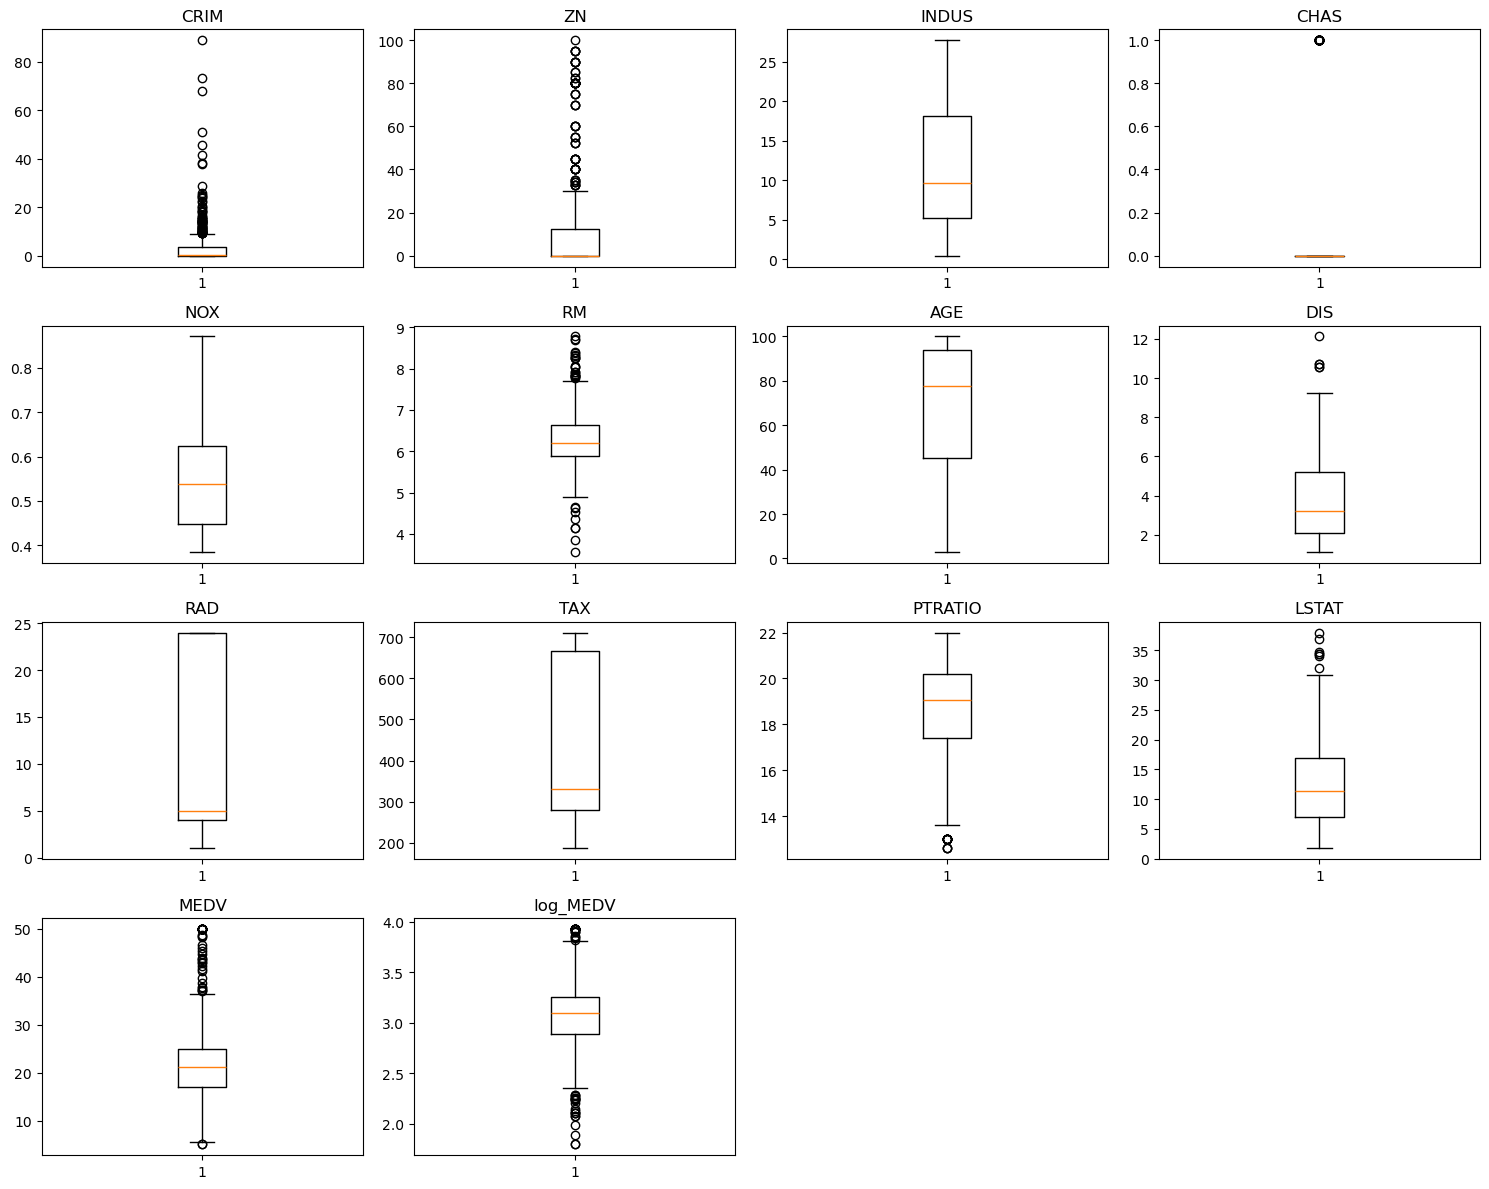

In [19]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [30]:
# Separating features and the target column

X = df.drop(["log_MEDV"], axis = 1)
y = df["log_MEDV"]

In [31]:
X = sm.add_constant(X)

In [32]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

## Model Building - Linear Regression

In [33]:
# from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mean_absolute_percentage_error(y_observed_train, y_pred_train) * 100,
                    mean_absolute_percentage_error(y_observed_test, y_pred_test) * 100,
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [34]:
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)
model1 = sm.OLS(y_train1, X_train1).fit()
model_pref(model1, X_train1, X_test)

    Data      RMSE       MAE      MAPE        r2
0  Train  0.192713  0.140133  4.864376  0.707630
1   Test  0.191963  0.143914  5.004389  0.682557


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train1))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* The VIF > 5 has to be dropped. TAX has the highest VIF, so it is necessary to drop it.

In [36]:
X_train1 = X_train1.drop('TAX',axis = 1)
X_test = X_test.drop('TAX',axis = 1)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train1))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


**Observations:**
* VIF scores of all features are less than 5 hence, no other feature should be dropped.

In [38]:
model1 = sm.OLS(y_train1, X_train1).fit()

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_MEDV   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.40e-101
Time:                        01:21:30   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model_pref(model1, X_train1, X_test)

    Data      RMSE       MAE      MAPE        r2
0  Train  0.194892  0.142894  4.958448  0.698983
1   Test  0.198258  0.149346  5.196776  0.649850


In [41]:
p_values = model1.pvalues
print("\nP-values for each feature:\n", p_values)


P-values for each feature:
 const      1.087048e-55
CRIM       7.929184e-13
ZN         1.551548e-01
INDUS      8.826010e-01
CHAS       2.220208e-03
NOX        2.960427e-08
RM         1.088644e-02
AGE        6.451978e-01
DIS        1.527260e-06
RAD        2.519669e-04
PTRATIO    1.102461e-10
LSTAT      2.019010e-28
dtype: float64


**Observations:**
* The p-values should be dropped if they are greater than 0.05. Hence, "ZN", "AGE", and "INDUS" should be dropped as their p-values are greater than 0.05.

In [42]:
X_train1 = X_train1.drop(["ZN","AGE", "INDUS"],axis = 1)
X_test = X_test.drop(["ZN","AGE", "INDUS"],axis = 1)

In [43]:
model2 = sm.OLS(y_train1, X_train1).fit()

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.61e-104
Time:                        01:21:58   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_pref(model2, X_train1, X_test)

    Data      RMSE       MAE      MAPE        r2
0  Train  0.195504  0.143686  4.981813  0.696514
1   Test  0.198045  0.151284  5.257965  0.647196


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [46]:
#Check for mean residuals

residuals = model2.resid
np.mean(residuals)

-4.795285323875323e-15

**Observations:**
* The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

In [47]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [48]:
# Check for Homoscedasticity
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 1.083508292342529), ('p-value', 0.30190120067668275)]

**Observations:**
* Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

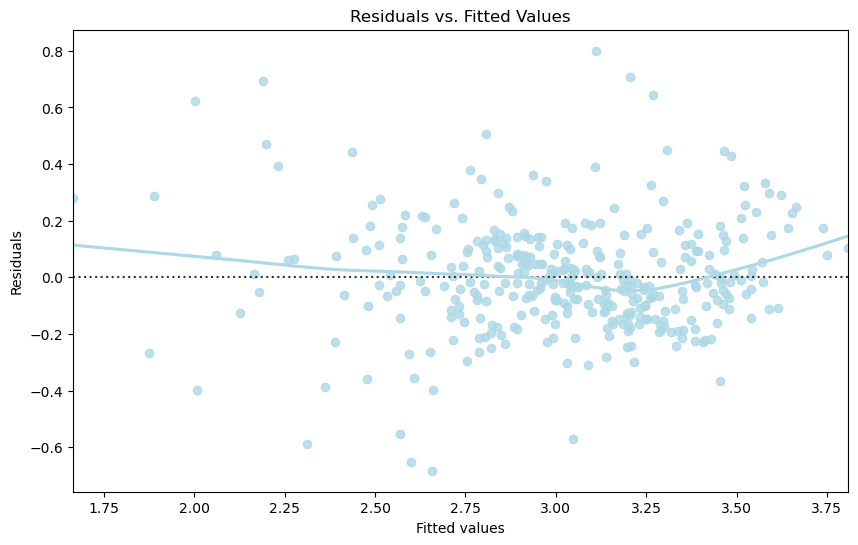

In [49]:
# Predicted values

plt.figure(figsize=(10, 6))
sns.residplot(x=model2.fittedvalues, y=residuals, color="lightblue", lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

**Observations:**
* There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.


<Axes: ylabel='Count'>

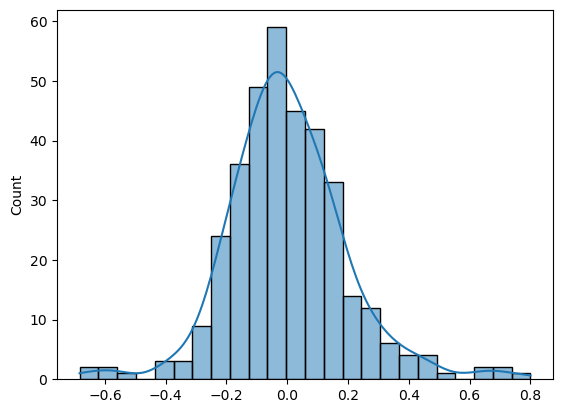

In [50]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

**Observations:**
* The histogram of residuals is normaly distributed without skew.

## Final Model

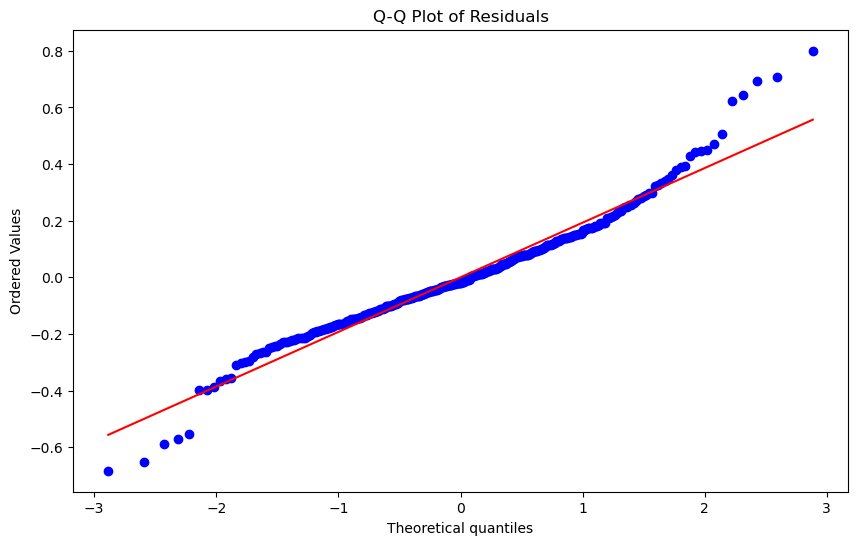

In [51]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Observations:**
* In the Q-Q plot above the points are highly close to the line, so the sample data follows the theoretical distribution well.


In [54]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train1, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train1, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


## Actionable Insights and Recommendations 

* We can use this prediction model to predict the price of houses in the locality.
* The model can include the rating for modes of transportations nearby like airports or train stations.
* The model can include the rating of schools.
* The model can include the attractions in the locality near the housing areas.
* The model can include the rating of supermarkets or stores in the locality to have easy access to groceries or daily household products.
* All the features in the dataset are nicely managed as it does not contain any null values or duplicates.
* Areas with higher zoning for large lots (ZN) often have higher property values. This zoning typically indicates more affluent neighborhoods with spacious housing.
* For local authorities, balance industrial and residential zoning to ensure residential areas remain attractive for living. For investors, be cautious when investing in highly industrialized areas as it may affect long-term property value appreciation.
* For city planners, improve public transportation and infrastructure to reduce travel times to employment centers. For buyers, consider properties closer to employment hubs to save on commuting time and costs.

___